# Import Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Preprocessing

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
# M -> Malignint
# B -> Benign

In [10]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
data['diagnosis'] = data['diagnosis'].astype('category')
data['diagnosis'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype   
--------------  -----   
569 non-null    category
dtypes: category(1)
memory usage: 825.0 bytes


In [12]:
data['diagnosis'] = data['diagnosis'].apply(lambda val:1 if val=='M' else 0)

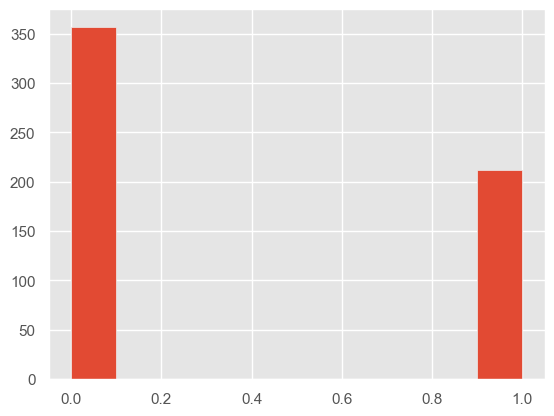

In [13]:
plt.hist(data['diagnosis'])
plt.show()

# Exploratory Data Analysis

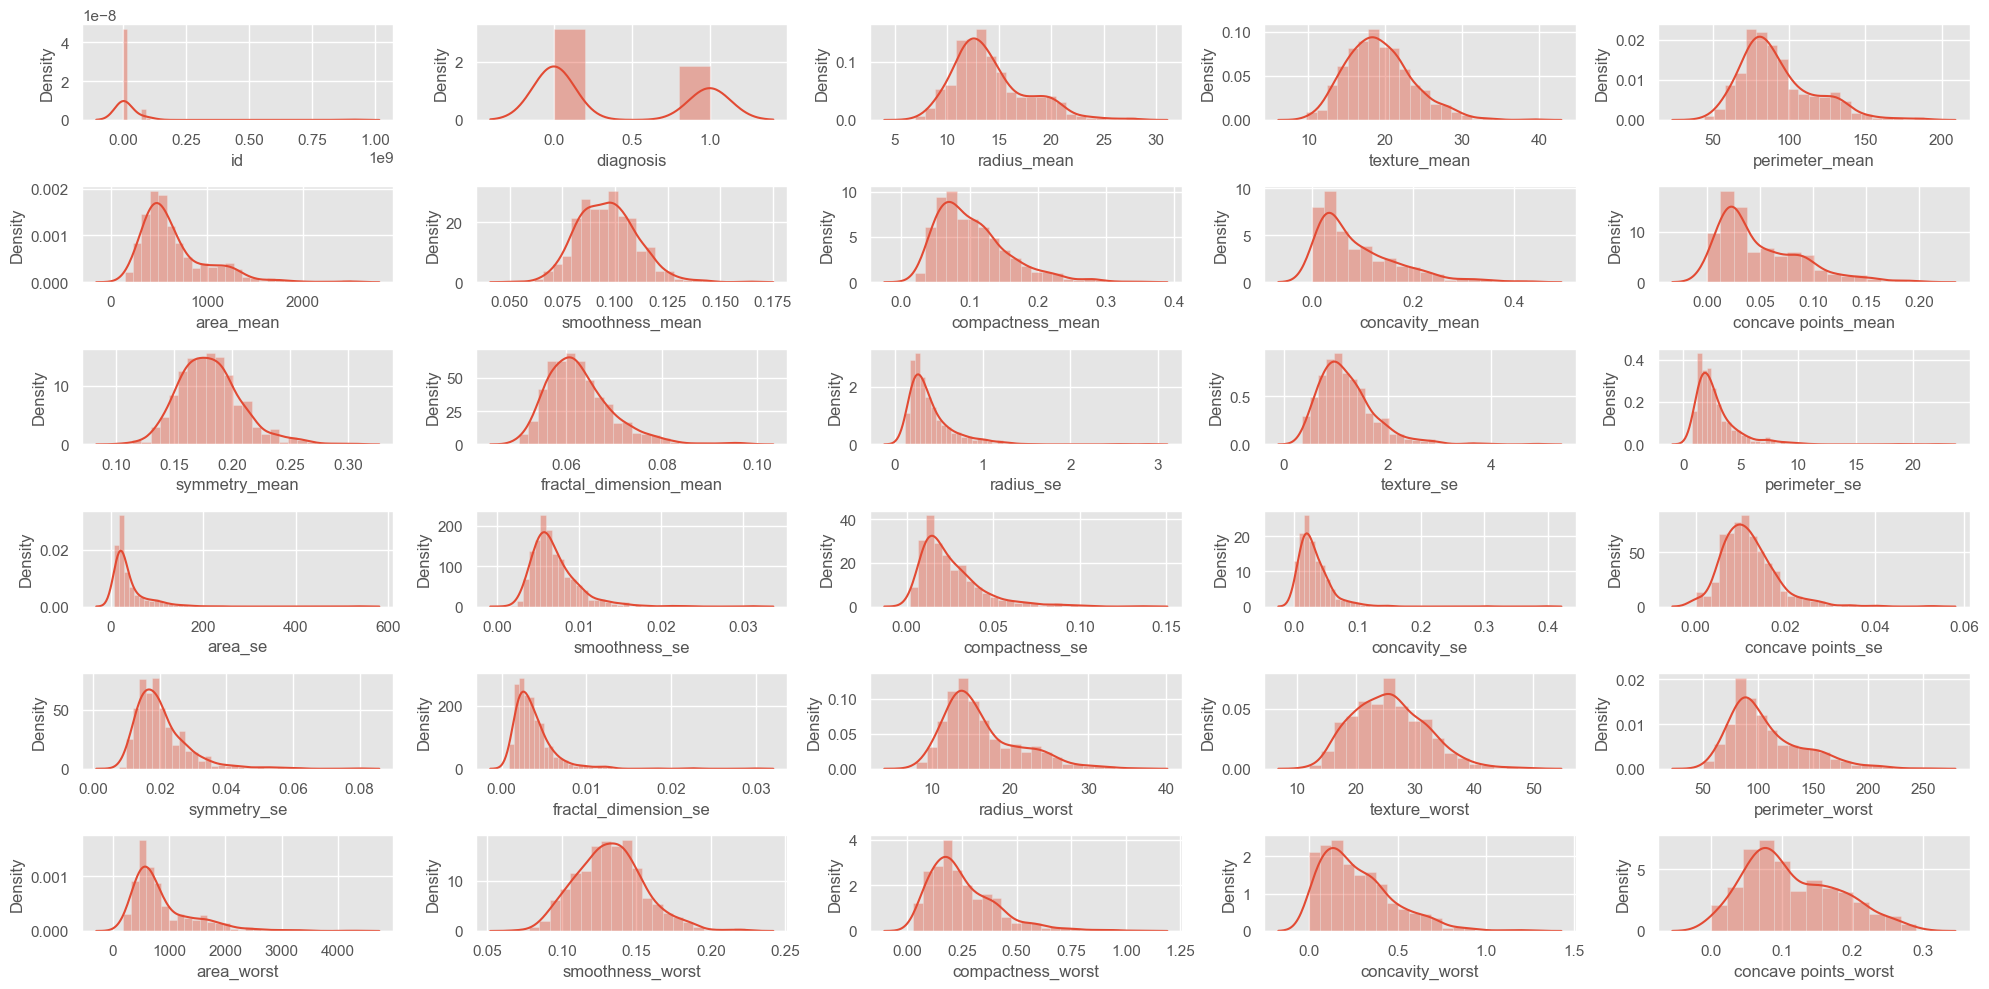

In [15]:
plt.figure(figsize=(20,10))
plotnumber = 1
for column in data:
    if plotnumber<=30:
        ax = plt.subplot(6,5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [16]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

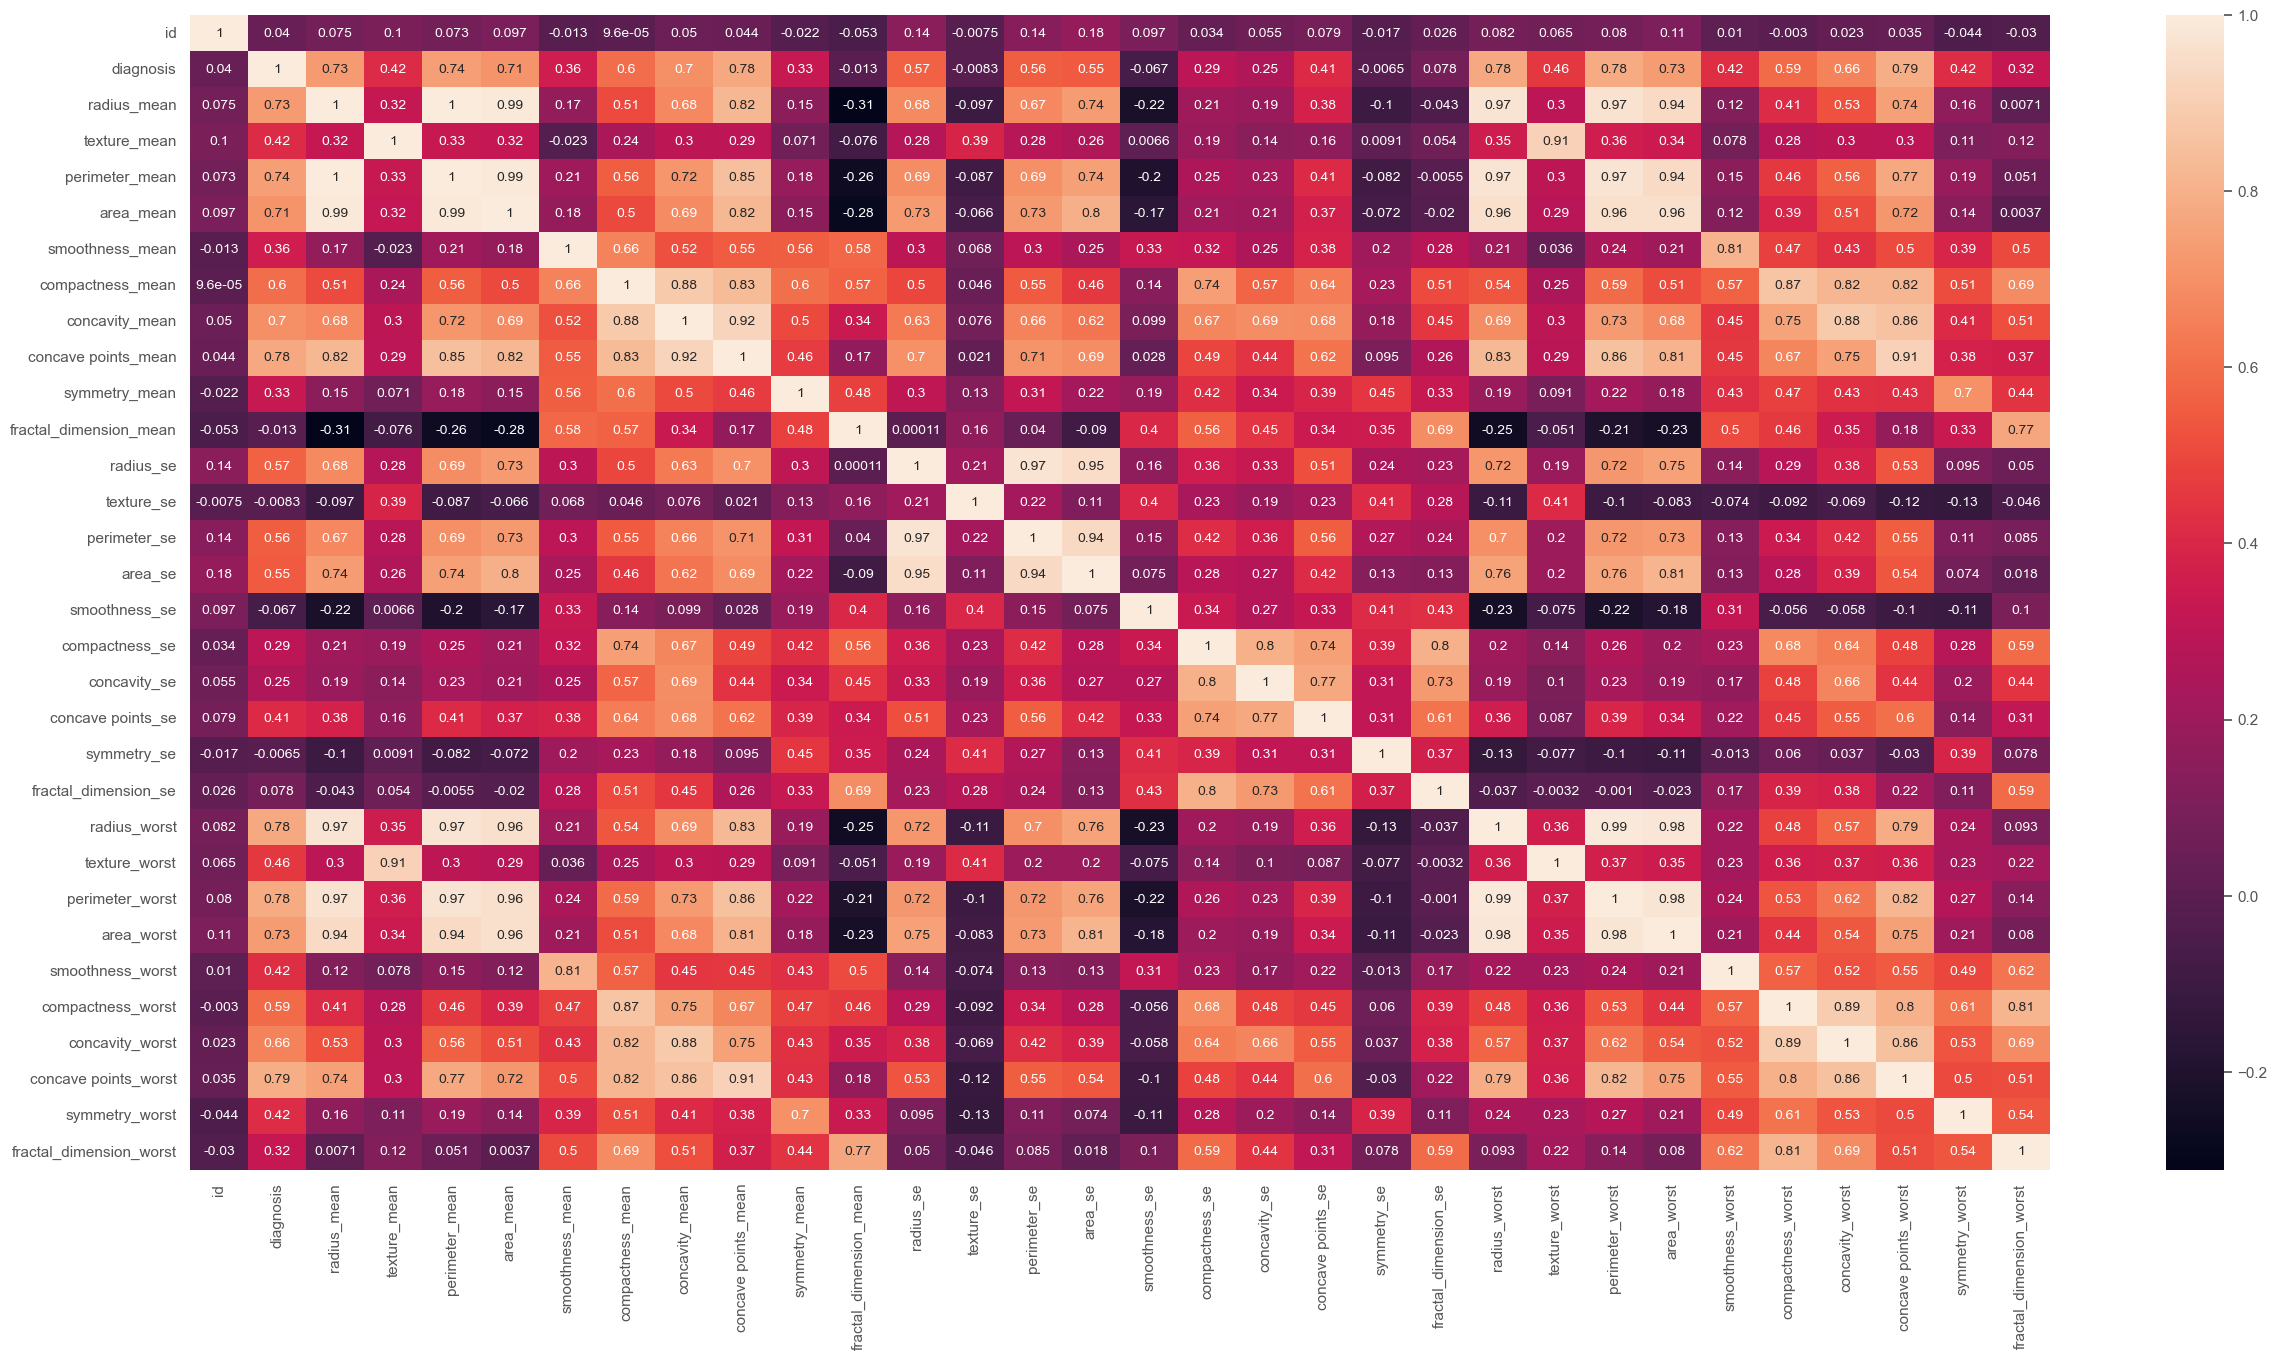

In [17]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True)

In [18]:
data.drop('id', axis=1, inplace=True)

In [19]:
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_data = corr_matrix.mask(mask)

to_drop = [x for x in tri_data.columns if any(tri_data[x]>0.92)]

In [20]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [21]:
data = data.drop(to_drop, axis =1)

print(data.shape)

(569, 23)


In [48]:
data.shape

(569, 23)

In [50]:
data.head(5)

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [55]:
print("X Shape", x.shape)
print("Y Shape", y.shape)

X Shape (569, 22)
Y Shape (569,)


# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [63]:
print("x_train Shape", x_train.shape)
print("x_test Shape", x_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

x_train Shape (455, 22)
x_test Shape (114, 22)
y_train Shape (455,)
y_test Shape (114,)


# Scaling Data

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [71]:
print("x_train Shape", x_train.shape)
print("x_test Shape", x_test.shape)

x_train Shape (455, 22)
x_test Shape (114, 22)


# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [77]:
log_reg = LogisticRegression() 

In [79]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred = log_reg.predict(x_test) 

In [83]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
log_reg_acc = accuracy_score(y_pred,y_test)
print(log_reg_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9649122807017544


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



[[66  3]
 [ 1 44]]


# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred = knn.predict(x_test)

In [92]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
knn_acc = accuracy_score(y_pred,y_test)
print(knn_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9298245614035088


              precision    recall  f1-score   support

           0       0.99      0.90      0.94        73
           1       0.85      0.98      0.91        41

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



[[66  7]
 [ 1 40]]


# SVM

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [99]:
svc = SVC(probability=True)

In [101]:
parameters = {
    'gamma':[0.00001,0.0001,0.001,0.01,0.1],
    'C':[0.05,0.5,0.1,1,5,10,15,20]
}

In [103]:
grid_search = GridSearchCV(svc, parameters)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.05, 0.5, 0.1, 1, 5, 10, 15, 20],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [106]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [107]:
grid_search.best_score_

0.9802197802197803

In [108]:
grid_search.best_estimator_

SVC(C=15, gamma=0.01, probability=True)

In [109]:
svc = SVC(C=15, gamma=0.01, probability=True)

In [115]:
svc.fit(x_train,y_train)

SVC(C=15, gamma=0.01, probability=True)

In [117]:
y_pred = svc.predict(x_test)

In [119]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
svc_acc = accuracy_score(y_pred,y_test)
print(svc_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9824561403508771


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.96      1.00      0.98        45

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



[[67  2]
 [ 0 45]]


# Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [125]:
dt = DecisionTreeClassifier()

In [127]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1)
} 

In [129]:
grid_search_dt = GridSearchCV(dt, parameters, cv=5, n_jobs=-1, verbose=1)

In [131]:
grid_search_dt.fit(x_train,y_train)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [133]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'splitter': 'random'}

In [135]:
grid_search_dt.best_score_

0.9626373626373625

In [137]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=5,
                       min_samples_split=6, splitter='random')

In [139]:
dt = DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=4, splitter='random')

In [141]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=4,
                       splitter='random')

In [143]:
y_pred = dt.predict(x_test)

In [145]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
dt_acc = accuracy_score(y_pred,y_test)
print(dt_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9649122807017544


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



[[65  2]
 [ 2 45]]


# Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [151]:
rc = RandomForestClassifier()

In [153]:
parameters = {
    'max_depth': range(10, 20),
    'max_features': range(0,14),
    'criterion': ['gini','entropy'],
    'n_estimators': [200, 500],
    'max_depth' : [10,11,12,13,14,15],
}

In [157]:
grid_search_rc = GridSearchCV(rc, parameters, cv=2, n_jobs=-1, verbose=1)

In [159]:
grid_search_rc.fit(x_train,y_train)

Fitting 2 folds for each of 336 candidates, totalling 672 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13, 14, 15],
                         'max_features': range(0, 14),
                         'n_estimators': [200, 500]},
             verbose=1)

In [161]:
grid_search_rc.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 9,
 'n_estimators': 500}

In [163]:
grid_search_rc.best_score_

0.9736552283793183

In [165]:
grid_search_rc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       n_estimators=500)

In [167]:
rc = RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9, n_estimators=500)

In [169]:
rc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       n_estimators=500)

In [171]:
y_pred = rc.predict(x_test)

In [173]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
rc_acc = accuracy_score(y_pred,y_test)
print(rc_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9649122807017544


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



[[66  3]
 [ 1 44]]


# Gradiend Boost Classifier

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [178]:
gbc = GradientBoostingClassifier()

In [180]:
parameters = {
    'loss':['log_loss','exponential'],
    'learning_rate':[0.0001,0.001,0.01,0.1,1,10,100],
    'n_estimators':[10,50,100,150,200]
}

In [184]:
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs=-5, verbose=1)

In [186]:
grid_search_gbc.fit(x_train,y_train)

Fitting 2 folds for each of 70 candidates, totalling 140 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                           100],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [10, 50, 100, 150, 200]},
             verbose=1)

In [188]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 50}

In [190]:
grid_search_gbc.best_score_

0.9670762810108973

In [192]:
grid_search_gbc.best_estimator_

GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=50)

In [194]:
gbc = GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=50)

In [196]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=50)

In [200]:
y_pred = gbc.predict(x_test)

In [202]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
gbc_acc = accuracy_score(y_pred,y_test)
print(gbc_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9649122807017544


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.91      1.00      0.96        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



[[67  4]
 [ 0 43]]


# XGB

In [205]:
from xgboost import XGBClassifier

In [213]:
xgbc = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

In [215]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [217]:
y_pred = xgbc.predict(x_test)

In [219]:
print(y_pred)
print('\n')
print(y_test)
print('\n')
xgbc_acc = accuracy_score(y_pred,y_test)
print(xgbc_acc)
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print(confusion_matrix(y_pred,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: category
Categories (2, int64): [0, 1]


0.9385964912280702


              precision    recall  f1-score   support

           0       0.97      0.93      0.95        70
           1       0.89      0.95      0.92        44

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



[[65  5]
 [ 2 42]]


# Model Comparison

In [245]:
all_models = pd.DataFrame({
    'MODEL':['Logistic Regression','KNN','SVM','Decision Tree Classifier','Random Forest Classifier','Gradient Boost Classifier','XGBoost Classifier'],
    'ACCURACY':[log_reg_acc,knn_acc,svc_acc, dt_acc, rc_acc,gbc_acc,xgbc_acc]
})

In [280]:
all_models

,MODEL,ACCURACY
0,Logistic Regression,0.964912
1,KNN,0.929825
2,SVM,0.982456
3,Decision Tree Classifier,0.964912
4,Random Forest Classifier,0.964912
5,Gradient Boost Classifier,0.964912
6,XGBoost Classifier,0.938596


In [286]:
all_models.to_csv("ALL MODELS PERFORMANCE.csv")

In [247]:
model.sort_values(by='ACCURACY',ascending=False)

,MODEL,ACCURACY
2,SVM,0.982456
0,Logistic Regression,0.964912
3,Decision Tree Classifier,0.964912
4,Random Forest Classifier,0.964912
5,Gradient Boost Classifier,0.964912
6,XGBoost Classifier,0.938596
1,KNN,0.929825


In [249]:
# Here, SVC has shown most Accuracy of 98.25 % , so we will use that

In [288]:
all_models['ACCURACY'].apply(lambda x: round(100*x,4))

0    96.4912
1    92.9825
2    98.2456
3    96.4912
4    96.4912
5    96.4912
6    93.8596
Name: ACCURACY, dtype: float64

# Saving Model

In [253]:
import pickle
model = svc
pickle.dump(model, open("breast_cancer_prediction.pkl","wb"))

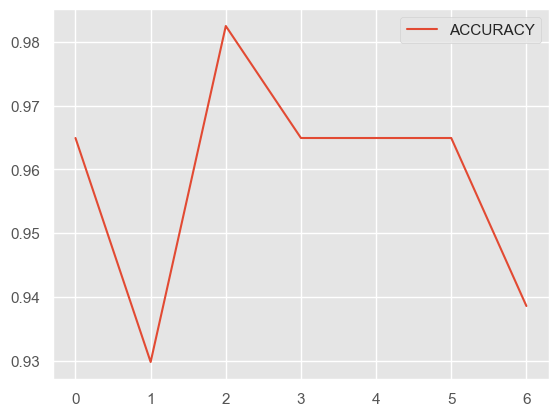

In [282]:
all_models.plot()
plt.savefig("ALL MODELS PERFORMANCE IMAGE", format='jpeg')